# Project Notebook: Why Have Some Businesses Thrived During the Pandemic?

In this notebook you will complete your own data analysis project, including: importing and downloading data; cleaning and filtering; plotting, interpretting and analysing data.

## Part 1: Import data

* Import the necessary packages to import the csv files in this folder.

In [1]:
#Import necessary packages here
import pandas as pd

* Have a look at the 'Stock Prices' folder, and then import one of the csv files in there to have see what structure the data has. Output the head of the dataframe to have a look.

In [2]:
#Read example csv file here
Stock_Prices_A = pd.read_csv("./Stock_Prices/Amazon.csv")
Stock_Prices_A.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-23,1793.030029,1804.900024,1745.229980,1749.619995,1749.619995,5270800
1,2019-08-26,1766.910034,1770.000000,1743.510010,1768.869995,1768.869995,3080000
2,2019-08-27,1775.729980,1779.400024,1746.680054,1761.829956,1761.829956,3019700
3,2019-08-28,1755.000000,1767.859985,1744.050049,1764.250000,1764.250000,2419700
4,2019-08-29,1783.000000,1798.550049,1777.250000,1786.400024,1786.400024,3015100


* Have a look at what columns are available in the data, and then reload the DataFrame but use the '```use_cols=```' keyword to select the most useful columns.

* Check that the data types of the columns are what you want using the ```.dtypes``` attribute.

In [3]:
#Check dtypes
Stock_Prices_A.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

* Reload the DataFrame, renaming the columns to something that makes more sense to you using the '```names=```' keyword.

* Now load the rest of the csv files with the same parameters that you have set for your example DataFrame above.

In [4]:
#Read rest of csv files here
Stock_Prices_Wcm = pd.read_csv("./Stock_Prices/Wacom.csv")
Stock_Prices_Ups = pd.read_csv("./Stock_Prices/UPS.csv")
Stock_Prices_Ts = pd.read_csv("./Stock_Prices/TataSteel.csv")
Stock_Prices_Lt = pd.read_csv("./Stock_Prices/Logitech.csv")
Stock_Prices_Cx = pd.read_csv("./Stock_Prices/Cemex.csv")

* Store the DataFrame variables as a list, i.e. ```Companies = [Company1, Company2, etc]```.

* Create another list of the company names as strings, i.e ```Company_Names = ['Company1', 'Company2', etc]```. This will become useful for plotting later.

In [5]:
#Companies list
All_companies = [Stock_Prices_A, Stock_Prices_Wcm, Stock_Prices_Ups, Stock_Prices_Ts, Stock_Prices_Lt, Stock_Prices_Cx]
#Company names list
All_companiesString = ['Stock_Prices_A', 'Stock_Prices_Wcm', 'Stock_Prices_Ups', 'Stock_Prices_Ts', 'Stock_Prices_Lt', 'Stock_Prices_Cx']

You need to check if the all the DataFrames have columns that are of the correct datatype. Some could include null data which would alter the overall datatype needed to store them.

* Write a for loop that checks that all the columns are of your chosen dtype and print out both the DataFrame and column name if a column is not of the write datatype.

In [6]:
for Company in All_companies:
    Company.drop(columns=['High', 'Low', 'Adj Close', 'Open'], inplace=True)

In [7]:
Stock_Prices_Wcm.dtypes

Date       object
Close     float64
Volume      int64
dtype: object

In [8]:
#for Company in Companies:    
#check columns for correct datatype
#print something to alert you if a datatype is not correct
for Company in All_companies:
    if Company.dtypes[1] != 'float64':
        print(Company)
    if Company.dtypes[2] != 'int64':
        print(Company)


           Date        Close      Volume
0    2019-08-23   345.250000  11210134.0
1    2019-08-26   338.049988  23764999.0
2    2019-08-27   350.899994  17375296.0
3    2019-08-28   336.950012  12641716.0
4    2019-08-29   335.549988  13481310.0
..          ...          ...         ...
489  2021-08-13  1461.650024  28969872.0
490  2021-08-16  1519.400024  27114488.0
491  2021-08-17  1503.699951  18970923.0
492  2021-08-18  1500.449951  12331745.0
493  2021-08-20  1375.599976  27340069.0

[494 rows x 3 columns]


## Part 2: Filter data

* Import the datetime object as 'dt' from the datetime package so you can change the date column to a manipulative format.

In [9]:
#import datetime object
from datetime import datetime as dt

* Output the first entry of the date column of your data to inspect its format.

In [10]:
#Select first item of date column of chosen DataFrame
Stock_Prices_Ups['Date']

0      2019-08-23
1      2019-08-26
2      2019-08-27
3      2019-08-28
4      2019-08-29
          ...    
498    2021-08-16
499    2021-08-17
500    2021-08-18
501    2021-08-19
502    2021-08-20
Name: Date, Length: 503, dtype: object

In [11]:
dt.strptime(Stock_Prices_Ups['Date'][0], '%Y-%m-%d' )

datetime.datetime(2019, 8, 23, 0, 0)

* Have a look [here](https://www.w3schools.com/python/python_datetime.asp) at what specifiers there are which correspond to the date's format, i.e. "%m-%Y".

* Apply the ```dt.strptime()``` method to convert your date item into a datetime object.

* Use the ```.apply()``` method to apply ```dt.strptime()``` to every item in your chosen DataFrame's date column, and write it over your DataFrame's current date column.

* Use a for loop to do the same for the rest of your DataFrames

In [12]:
#For loop
for Company in All_companies:
    Company['Date'] = Company['Date'].apply(dt.strptime, args=('%Y-%m-%d',))

We only want to look at the data since the pandemic as well as a little before for reference a measure of its impact.

* Remove data from more than 2 years ago, using a mask and a transient datetime object.

## Part 3: Plot data

* Import the pyplot subpackage as plt from matplotlib.

In [13]:
import matplotlib.pyplot as plt

* Plot a chosen DataFrame's stock price column against its date column, using plt.plot().

In [14]:
Stock_Prices_A.dtypes['Date']

dtype('<M8[ns]')

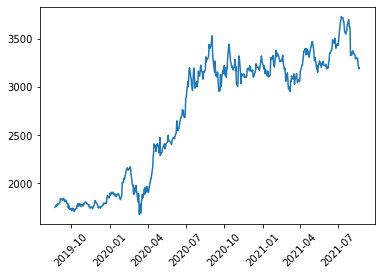

In [15]:
plt.plot(Stock_Prices_A["Date"], Stock_Prices_A["Close"])
plt.xticks(rotation=45);

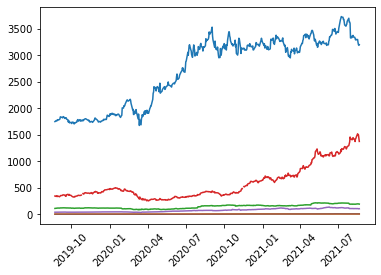

In [16]:
#For loop
for Company in All_companies:
    plt.plot(Company["Date"], Company["Close"])
    plt.xticks(rotation=45);

* Use a for loop to plot all DataFrames like this on the same plot.

Okay it appears that the stock prices are on different scales. We can normalise the scales by defining a new column on each DataFrame called the 'Normalised Stock Price' by dividing by the mean stock price.

* Use the ```DataFrame[column].agg()```, specifying you want to use the inbuilt 'mean' function to calculate the mean of the Stock price column.

* Store it as a suitable variable.

* Create a new column called 'Normalised Stock Price' by dividing the stock price column by the mean value.

* Write a for loop to do the same for the remaining dataframes.

In [17]:
#For loop
for Company in All_companies:
    mean_stock_price=Company['Close'].agg('mean', axis= 'rows') #use the aggregate method here to find the mean
    Company['Normalised Stock Price'] = Company['Close']/mean_stock_price #Normalised stock price column = old stock price column/mean

* Retry plotting your data but use the normalised stock price column as the y-variable this time add a keyword ```label = CompanyName```, where company name is an item from the list of strings you made earlier.

Text(0, 0.5, 'Normalised Stock Data')

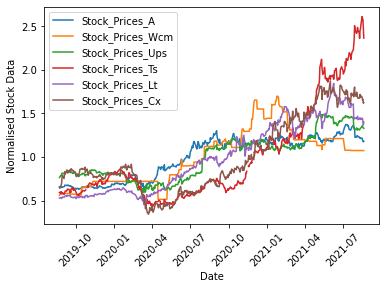

In [18]:
Stock_Prices_Wcm.head()
All_companies = [Stock_Prices_A, Stock_Prices_Wcm, Stock_Prices_Ups, Stock_Prices_Ts, Stock_Prices_Lt, Stock_Prices_Cx]
All_companiesString = ['Stock_Prices_A', 'Stock_Prices_Wcm', 'Stock_Prices_Ups', 'Stock_Prices_Ts', 'Stock_Prices_Lt', 'Stock_Prices_Cx']
i=0

#For loop
for Company in All_companies:
    plt.plot(Company["Date"], Company["Normalised Stock Price"], label=All_companiesString[i])
    plt.xticks(rotation=45);
    i += 1

#plt.xticks(rotation = 45)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Normalised Stock Data')

Let's tidy the plot up a bit.

In the above cell write the following statements:
* plt.xticks() - specify the rotation you want using ```rotation=``` keyword
* plt.legend()
* plt.xlabel() - add a x-label name in the brackets
* plt.ylabel() - add a y-label name in the brackets

## Part 4: Picking companies from a large dataset

You will now look at a large dataset from a range of US-based companies and pick out those whose stock prices have risen based linear models, rather than inspecting individually chosen companies above. This section will be less guided than the above and you can make decisions based on discussion and looking at the datasets.

* Load the files 'US_Daily_Shares' and 'Company_Names' into two separate DataFrames. They are delimited by ',' and ';' respectively.

In [19]:
import pandas as pd

In [20]:
#Load US_Daily_Shares
US_Daily_Shares = pd.read_csv("./Stock_Prices/US_Daily_Shares.csv")
#Load Company_Names
Company_Names = pd.read_csv("./Stock_Prices/Company_Names.csv", sep=';')

In [21]:
Company_Names.head()

,Ticker,SimFinId,Company Name,IndustryId
0,A,45846,AGILENT TECHNOLOGIES INC,106001.0
1,AA,367153,Alcoa Corp,110004.0
2,AAC_delist,939324,"AAC Holdings, Inc.",106011.0
3,AAL,68568,American Airlines Group Inc.,100006.0
4,AAMC,847094,Altisource Asset Management Corp,104001.0


In [22]:
US_Daily_Shares = US_Daily_Shares.merge(Company_Names[['Ticker', 'Company Name']] , how = 'inner')

In [23]:
#Filter data
US_Daily_Shares.head()
US_Daily_Shares = US_Daily_Shares.drop(['Ticker', 'SimFinId', 'Open', 'Low', 'High', 'Adj. Close', 'Dividend', 'Volume', 'Shares Outstanding'], axis=1)

In [24]:
#Add gradient column to the shares dataframe
US_Daily_Shares['Gradient'] = 0

#Extract the company names from the shares dataframe using the groupby method
Company_Names = US_Daily_Shares.groupby('Company Name').groups.keys()

In [25]:
import numpy as np

for Company in Company_Names:
    #DataFrame for particular company to fit model to.
    Fit_DF = US_Daily_Shares[US_Daily_Shares['Company Name'] == Company].copy()
    
    try:
        m, b = np.polyfit(np.arange(0, Fit_DF.shape[0], 1), Fit_DF['Close'], deg=1) #Linear model
        US_Daily_Shares['Gradient'] = US_Daily_Shares['Gradient'].mask(US_Daily_Shares['Company Name']==Company, m)
    except (np.linalg.linalg.LinAlgError, ValueError):
        continue

C:\Users\James\anaconda3\lib\site-packages\numpy\lib\polynomial.py:628: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


In [26]:
#Filter data based on gradient value
from datetime import datetime as dt

Successful_Companies = US_Daily_Shares[US_Daily_Shares['Gradient'] > 1]
Failed_Companies = US_Daily_Shares[US_Daily_Shares['Gradient'] < -0.5]

#Convert 'Date' column to datetime object
Successful_Companies['Date'] = Successful_Companies['Date'].apply(dt.strptime, args=("%Y-%m-%d",))
Failed_Companies['Date'] = Failed_Companies['Date'].apply(dt.strptime, args=("%Y-%m-%d",))

#Extract Company names of remaining rows
Successful_Names = list(Successful_Companies.groupby('Company Name').groups.keys())
Failed_Names = list(Failed_Companies.groupby('Company Name').groups.keys())

#Pick success or fail to plot
Success_Or_Fail_DF = Successful_Companies
Success_Or_Fail_Names = Successful_Names

#Pick data at random
np.random.shuffle(Success_Or_Fail_Names)
Selection=Success_Or_Fail_Names[:9]

<ipython-input-26-d412a8d658a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Successful_Companies['Date'] = Successful_Companies['Date'].apply(dt.strptime, args=("%Y-%m-%d",))
<ipython-input-26-d412a8d658a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Failed_Companies['Date'] = Failed_Companies['Date'].apply(dt.strptime, args=("%Y-%m-%d",))


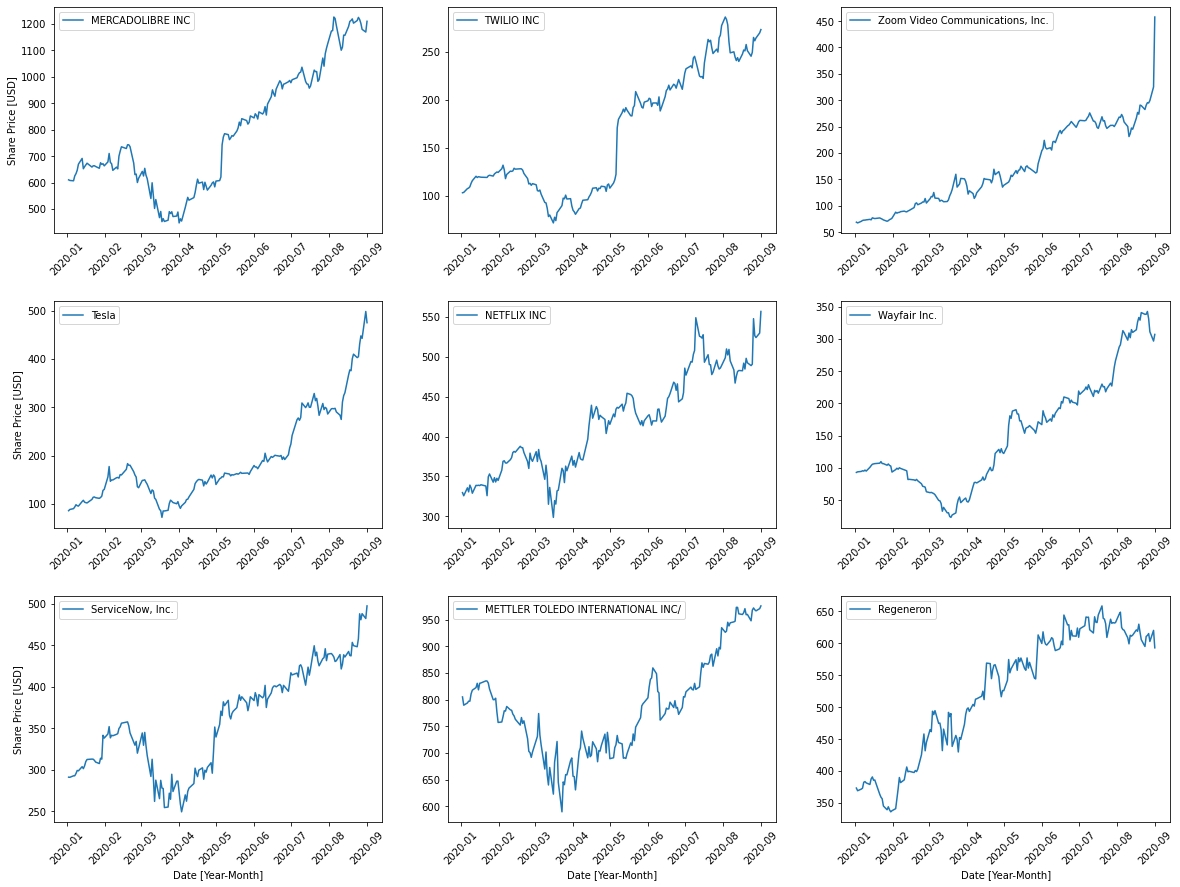

In [27]:
#plot data
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(20, 15)) #gridspec for uneven grid plots 
i = 0

for Company in Selection:

    Company_Data=Success_Or_Fail_DF[Success_Or_Fail_DF['Company Name']==Company].copy()
    
    axis=axes[int(np.floor(i/3))][int(i%3)]
    axis.plot(Company_Data['Date'], Company_Data['Close'], label=Company)
    axis.legend()
    plt.setp(axis.xaxis.get_majorticklabels(), rotation=45)
    
    i+=1
    
fig.subplots_adjust(hspace=0.3)

axes[0][0].set_ylabel('Share Price [USD]');
axes[1][0].set_ylabel('Share Price [USD]');
axes[2][0].set_ylabel('Share Price [USD]');

axes[2][0].set_xlabel('Date [Year-Month]');
axes[2][1].set_xlabel('Date [Year-Month]');
axes[2][2].set_xlabel('Date [Year-Month]');